In [1]:
#import librares
import pandas as pd
import sqlite3 as sql
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

Connect with the internal database

In [2]:
db = "db.db"
conn = sql.connect(db)

 Using SQL to exract the data from files to join two tables (olist_customers_dataset and olist_orders_dataset)  


In [3]:
query = ''' select olist_customers_dataset.customer_id , olist_customers_dataset.customer_state , olist_orders_dataset.order_id , olist_orders_dataset.order_status , olist_orders_dataset.order_purchase_timestamp , olist_orders_dataset.order_delivered_customer_date
from olist_customers_dataset  
INNER JOIN olist_orders_dataset
on olist_customers_dataset.customer_id = olist_orders_dataset.customer_id ;
 '''
join_1 = pd.read_sql_query(query,conn)
join_1.head()

,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35
1,18955e83d337fd6b2def6b18a428ac77,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19
2,4e7b3e00288586ebd08712fdd0374a03,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51
3,b2b6027bc5c5109e529d4dc6358b12c3,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25
4,4f2d8ab171c80ec8364f7c12e35b23ad,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48


Cleaning the data:

There are null values here at the time of delivered to the customers, which are cases where the shipment was not sent because it was canceled

In [209]:
print join_1.isnull().sum()

customer_id                         0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2965
dtype: int64


Number of customers

In [210]:
Num_cust = len (join_1.customer_id)
print ("Number of customer = {}".format(Num_cust))

Number of customer = 99441


 Because the number of cities is too large the places of purchase were limited to the states the highest state with the highest number of customers was Sao Paulo (SP).Because it is the highest state in brazil with a population (44,035,304).

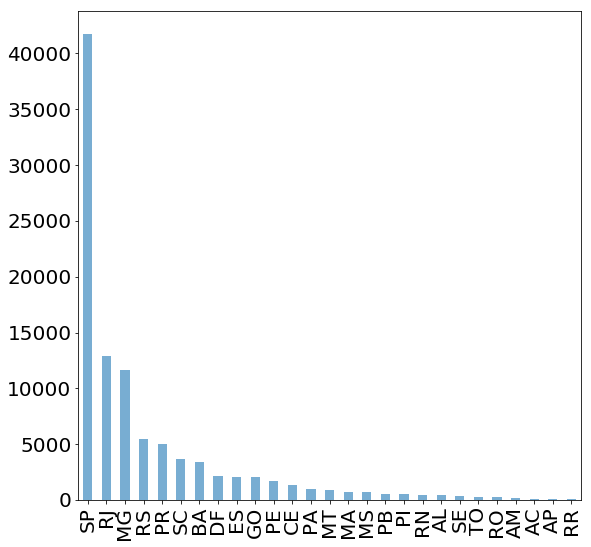

In [211]:
join_1['customer_state'].value_counts().plot(kind='bar',alpha=0.6,figsize=(9,9))
plt.show()

In [212]:
join_1['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

A very large percentage of successful order status (97%)

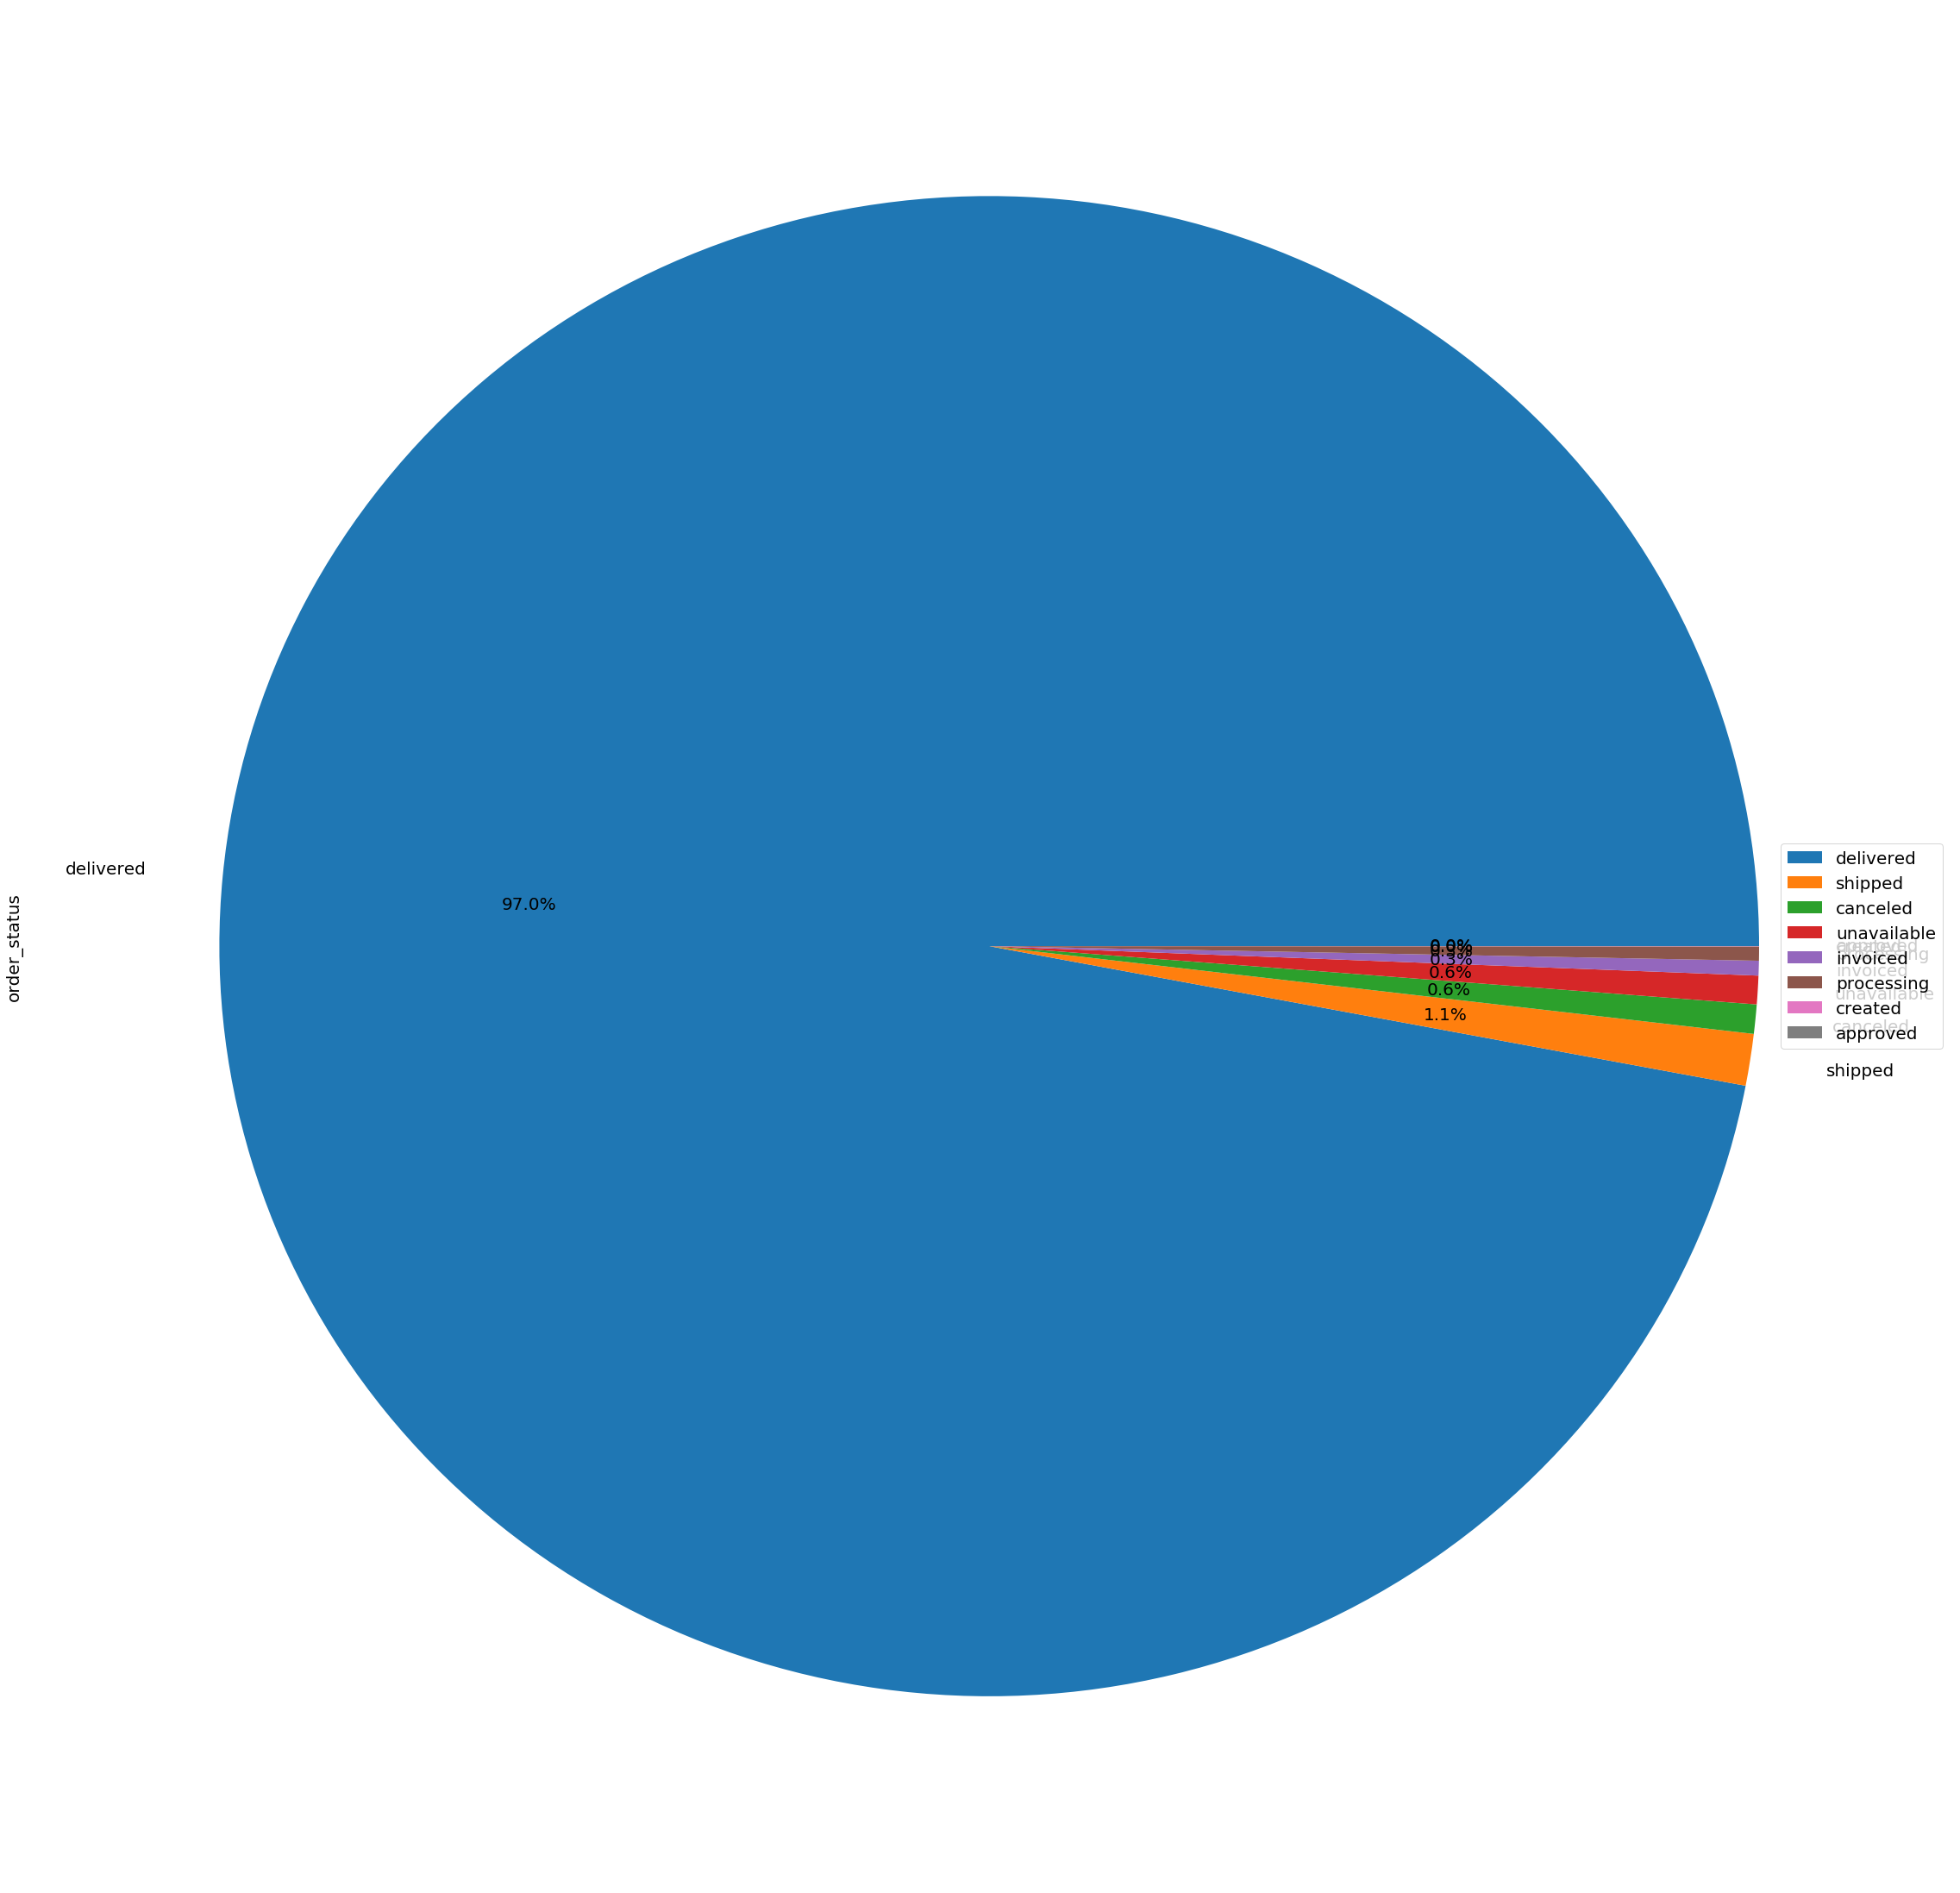

In [213]:
figure(num=None, figsize=(40, 40))
join_1['order_status'].value_counts().plot(kind='pie', autopct='%1.1f%%' )
plt.legend( loc = 'right')
plt.rcParams['font.size'] = 20

 Add a column that calculates the time it takes from the start of the order purchase to the delivery to customers

In [16]:
join_1['order_delivered_customer_date'] = pd.to_datetime(join_1['order_delivered_customer_date'])

In [17]:
join_1['order_purchase_timestamp'] = pd.to_datetime(join_1['order_purchase_timestamp'])

In [18]:
join_1["Total_time"] = join_1["order_delivered_customer_date"] - join_1["order_purchase_timestamp"]
join_1.head()

,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,Total_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,8 days 19:30:00
1,18955e83d337fd6b2def6b18a428ac77,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,16 days 15:52:55
2,4e7b3e00288586ebd08712fdd0374a03,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,26 days 01:51:06
3,b2b6027bc5c5109e529d4dc6358b12c3,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,14 days 23:57:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,11 days 11:04:18


In [ ]:
# Calculate the average delivery days

In [20]:
time = join_1['Total_time'].mean()
print ( "Mean of time = {} ".format(time) )

Mean of time = 12 days 13:24:31.879068 


In [ ]:
#######################################################################################################################

In [164]:
# join two tables (olist_order_items_dataset and olist_sellers_dataset)  
query_2 = '''select distinct olist_order_items_dataset.order_id,olist_order_items_dataset.order_item_id , olist_order_payments_dataset.payment_type, olist_order_payments_dataset.payment_installments, olist_order_payments_dataset.payment_value ,  olist_order_items_dataset.price ,  olist_order_items_dataset.freight_value
from olist_order_payments_dataset
 left JOIN olist_order_items_dataset
on  olist_order_payments_dataset.order_id = olist_order_items_dataset.order_id
 '''
join_2 = pd.read_sql_query(query_2,conn)
join_2.head()


,order_id,order_item_id,payment_type,payment_installments,payment_value,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8,99.33,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1.0,credit_card,1,24.39,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,credit_card,1,65.71,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1.0,credit_card,8,107.78,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1.0,credit_card,2,128.45,113.57,14.88


In [165]:
#check about null values
print join_2.isnull().sum()

order_id                771
order_item_id           771
payment_type              0
payment_installments      0
payment_value             0
price                   771
freight_value           771
dtype: int64


In [166]:
#drop null values
join_2.dropna(subset=['order_id'], inplace=True)

In [167]:
#check about null values
print join_2.isnull().sum()

order_id                0
order_item_id           0
payment_type            0
payment_installments    0
payment_value           0
price                   0
freight_value           0
dtype: int64


Add column (total) to calculate total purchase process (price  +  freight_value) From which we make sure the paid account, Payment_value column equal total column

In [169]:
join_2['total'] = join_2['price'] + join_2['freight_value']
order_items_total = join_2['total'] * join_2['order_item_id']
order_items_total

0          99.33
1          24.39
2          65.71
3         107.78
4         128.45
5          48.06
6          96.12
7          81.16
8          51.84
9         341.09
10         51.95
11        188.73
12         70.46
13        142.88
14         37.89
15         75.78
16        102.66
17        105.28
18        157.45
19        132.04
20         98.94
21        244.15
22        136.71
23         47.69
24        170.57
25         67.50
26        180.22
27        172.86
28        259.29
29         55.11
           ...  
117657     36.11
117658    104.85
117659    124.52
117660     26.37
117661    264.53
117662    356.53
117663    205.71
117664     57.51
117665     96.90
117666    165.80
117667     87.58
117668     51.99
117669    217.80
117670    100.55
117671    366.60
117672     60.69
117673     84.23
117674     91.03
117675     90.28
117676     89.27
117677    170.14
117678    127.92
117679    194.11
117680     47.62
117681    198.94
117683    363.31
117684     96.80
117685     47.

In [170]:
join_2.head()

,order_id,order_item_id,payment_type,payment_installments,payment_value,price,freight_value,total
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8,99.33,79.80,19.53,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1.0,credit_card,1,24.39,17.00,7.39,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,credit_card,1,65.71,56.99,8.72,65.71
3,ba78997921bbcdc1373bb41e913ab953,1.0,credit_card,8,107.78,89.90,17.88,107.78
4,42fdf880ba16b47b59251dd489d4441a,1.0,credit_card,2,128.45,113.57,14.88,128.45


number of orders

In [172]:
Num_orders = len (join_2.order_id)
print ("Number of orders = {}".format(Num_orders))

Number of orders = 116917


calculate the average and sum of total

In [183]:
array = np.asarray(join_2)
array

array([[u'b81ef226f3fe1789b1e8b2acac839d17', 1.0, u'credit_card', ...,
        79.8, 19.53, 99.33],
       [u'a9810da82917af2d9aefd1278f1dcfa0', 1.0, u'credit_card', ...,
        17.0, 7.39, 24.39],
       [u'25e8ea4e93396b6fa0d3dd708e76c1bd', 1.0, u'credit_card', ...,
        56.99, 8.72, 65.71000000000001],
       ...,
       [u'32609bbb3dd69b3c066a6860554a77bf', 1.0, u'credit_card', ...,
        39.99, 7.78, 47.77],
       [u'b8b61059626efa996a60be9bb9320e10', 1.0, u'credit_card', ...,
        349.0, 20.54, 369.54],
       [u'28bbae6599b09d39ca406b747b6632b1', 1.0, u'boleto', ..., 169.9,
        21.68, 191.58]], dtype=object)

In [189]:
sum_arr = array[:,7].sum()
mean_arr = array[:,7].mean()
print ("Sum = {}".format(sum_arr))
print ("mean = {}".format(mean_arr))

Sum = 16466531.12
mean = 140.839494


The highest payment method is a credit card, which means that Brazil has advanced in the process of e-shopping as it is from emerging market

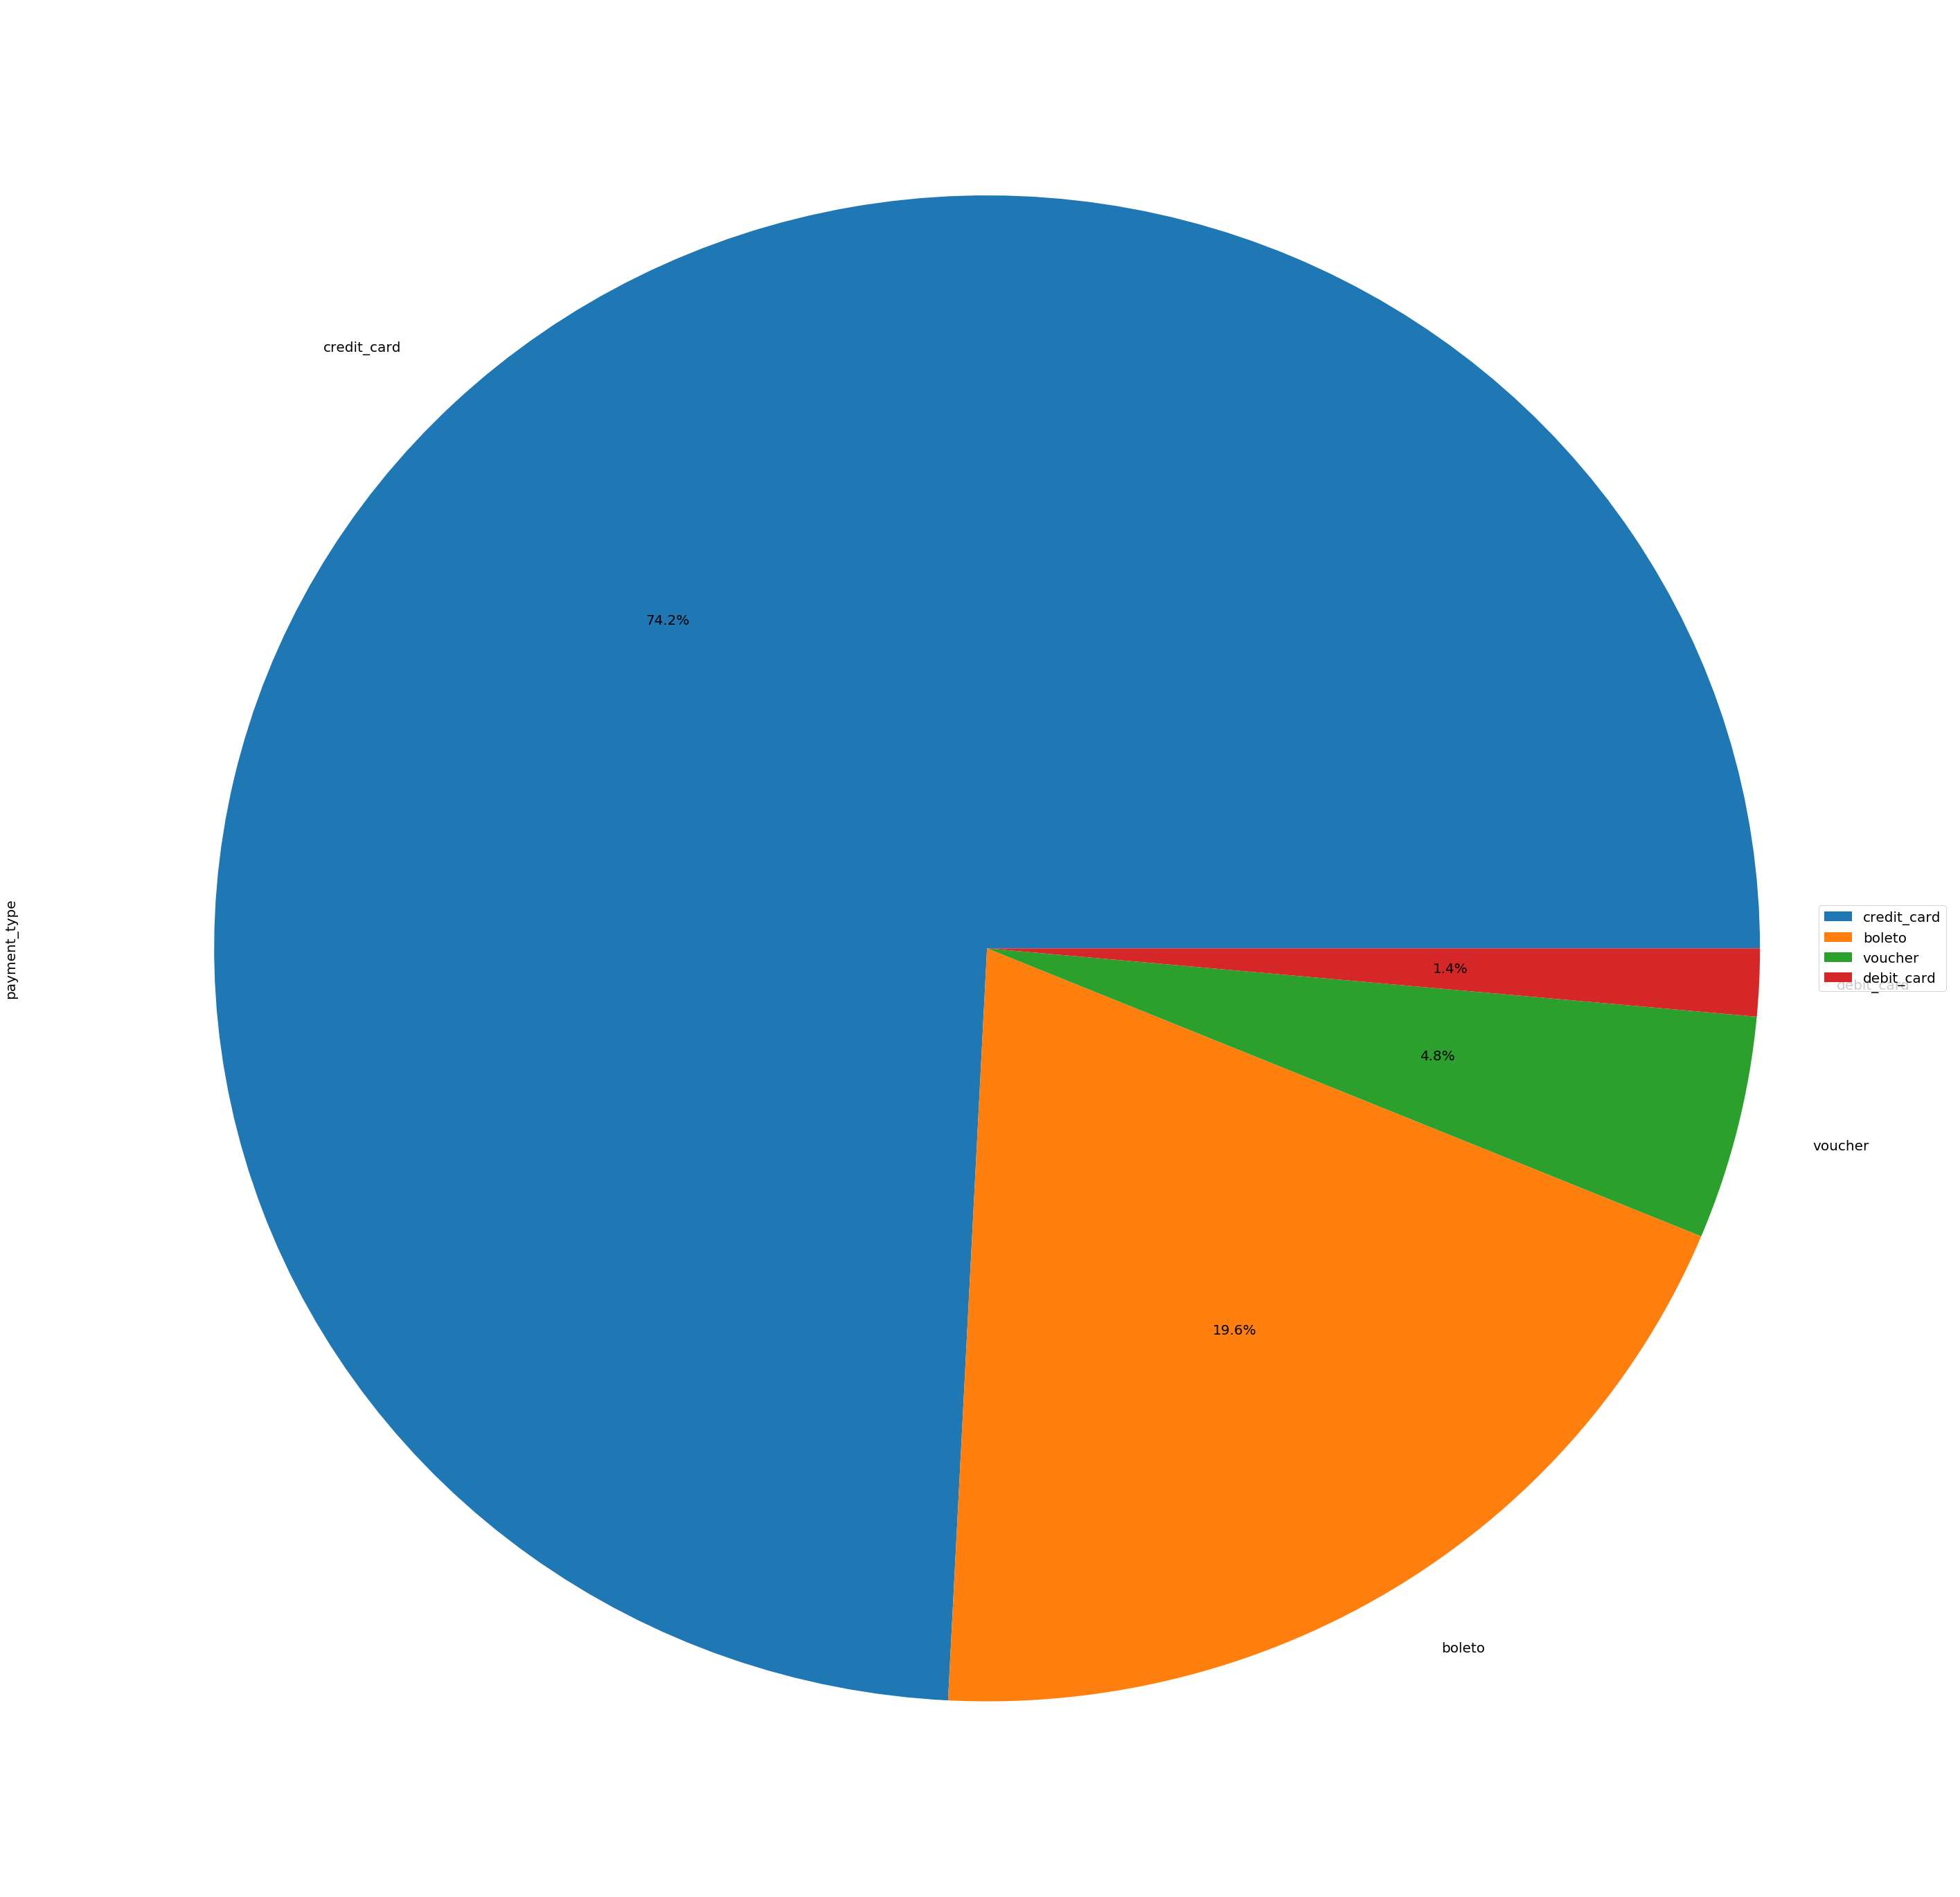

In [161]:
figure(num=None, figsize=(50, 50))
join_2['payment_type'].value_counts().plot(kind='pie', autopct='%1.1f%%' )
plt.legend( loc = 'right')
plt.rcParams['font.size'] = 20

 The number of people who have specified installment payments.This shows that Olist has introduced a payment system in installments, due to the high poverty rate in Brazil Many people opt for multiple payments. But still the highest number of people who pay once

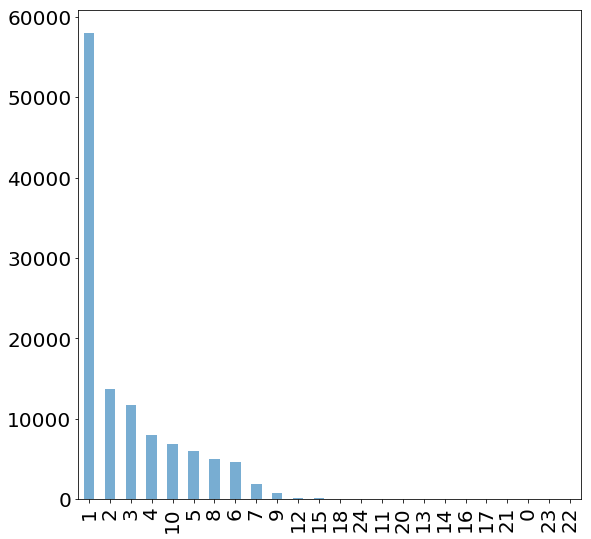

In [163]:
join_2['payment_installments'].value_counts().plot(kind='bar',alpha=0.6,figsize=(9,9))
plt.show()